In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log
from collections import Counter

In [2]:
df = pd.read_json('top_ai_subset.txt',encoding="utf-8", lines=True)

In [3]:
df.head(10)

,id,title,authors,venue,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,references,indexed_abstract,fos,doi
0,100638832,Learning English Light Verb Constructions: Con...,"[{'name': 'Yuancheng Tu', 'id': '2161005799', ...",{'raw': 'meeting of the association for comput...,2011,28,31,39,Conference,Association for Computational Linguistics,,,"[40123913, 85238235, 1498763386, 1579558000, 1...","{'IndexLength': 138, 'InvertedIndex': {'In': [...","[{'name': 'Light verb', 'w': 0.556838751}, {'n...",NaN
1,101796631,A SVM-Based Model for Chinese Functional Chunk...,"[{'name': 'Yingze Zhao', 'id': '2616090506'}, ...",{'raw': 'meeting of the association for comput...,2006,3,94,101,Conference,,,,"[1623072288, 1823542770, 1954417598, 198899550...","{'IndexLength': 105, 'InvertedIndex': {'Functi...","[{'name': 'Predicate (grammar)', 'w': 0.455723...",NaN
2,1019104620,A Generative Model of Vector Space Semantics,"[{'name': 'Jacob Andreas', 'id': '2558501541',...",{'raw': 'meeting of the association for comput...,2013,5,91,99,Conference,,,,"[170166889, 1549334072, 1608322251, 1880262756...","{'IndexLength': 104, 'InvertedIndex': {'We': [...","[{'name': 'Computer science', 'w': 0.4223011},...",NaN
3,102083554,UBA: Using Automatic Translation and Wikipedia...,"[{'name': 'Pierpaolo Basile', 'id': '213524799...",{'raw': 'meeting of the association for comput...,2010,6,242,247,Conference,Association for Computational Linguistics,,,"[2092689630, 2128514324, 2153225416, 217998488...","{'IndexLength': 193, 'InvertedIndex': {'This':...","[{'name': 'Exploit', 'w': 0.40942737500000004}...",NaN
4,102440339,Learning Morphology with Pair Hidden Markov Mo...,"[{'name': 'Alexander Clark', 'id': '2586934785...",{'raw': 'meeting of the association for comput...,2001,21,55,60,Conference,,,,"[1513168562, 1797345057, 2009570821, 210244363...","{'IndexLength': 66, 'InvertedIndex': {'In': [0...","[{'name': 'Variable-order Bayesian network', '...",NaN
5,102951417,Improving summarization through rhetorical par...,"[{'name': 'Daniel Marcu', 'id': '1853234685', ...",{'raw': 'meeting of the association for comput...,1998,74,,,Conference,,,,"[40273907, 1667614912, 1828401780, 1967752093,...",NaN,"[{'name': 'Natural language processing', 'w': ...",NaN
6,104385336,SZTERGAK : Feature Engineering for Keyphrase E...,"[{'name': 'Gábor Berend', 'id': '2432553231', ...",{'raw': 'meeting of the association for comput...,2010,13,186,189,Conference,Association for Computational Linguistics,,,"[1490343430, 1907578970, 2045181608, 206077262...","{'IndexLength': 88, 'InvertedIndex': {'Automat...","[{'name': 'Supervised learning', 'w': 0.521146...",NaN
7,105490757,Designing Special Post-Processing Rules for SV...,"[{'name': 'Muhua Zhu', 'id': '2628080501', 'or...",{'raw': 'meeting of the association for comput...,2006,6,217,220,Conference,,,,"[1979145089, 2117400858, 2785522575]","{'IndexLength': 95, 'InvertedIndex': {'We': [0...","[{'name': 'Speech recognition', 'w': 0.4611401...",NaN
8,106250223,Recognizing Arguing Subjectivity and Argument ...,"[{'name': 'Alexander Conrad', 'id': '212173274...",{'raw': 'meeting of the association for comput...,2012,27,80,88,Conference,Association for Computational Linguistics,,,"[44262497, 1548608284, 1563792215, 2022204871,...","{'IndexLength': 128, 'InvertedIndex': {'In': [...","[{'name': 'Parsing', 'w': 0.487827063}, {'name...",NaN
9,106483518,Very Large Lexical Databases.,"[{'name': 'James Pustejovsky', 'id': '19915186...",{'raw': 'meeting of the association for comput...,2001,0,2,,Conference,,,,NaN,NaN,"[{'name': 'Artificial intelligence', 'w': 0.0}...",NaN


In [4]:
df.shape

(76011, 16)

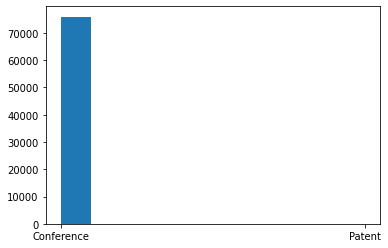

In [5]:
plt.hist(df["doc_type"])
plt.show()

In [6]:
Counter(df["doc_type"])

Counter({'Conference': 75938, 'Patent': 73})

In [7]:
pub_ctn=Counter(df["publisher"])
pub_ctn.pop("")

13949

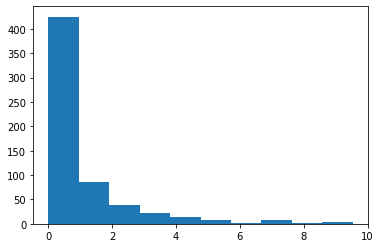

In [8]:
plt.hist([log(i) for i in pub_ctn.values()])
plt.show()

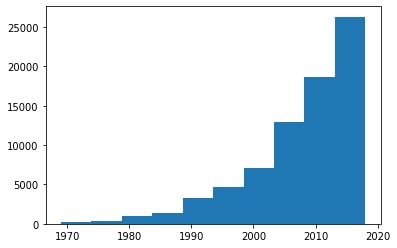

In [9]:
plt.hist(df["year"])
plt.show()

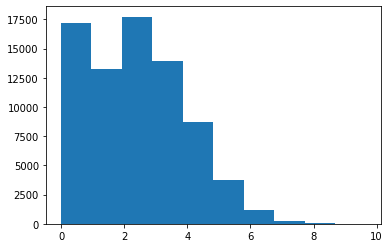

In [10]:
df['n_citation'] = df['n_citation'].apply(int)

plt.hist((df["n_citation"]+1).apply(log))
plt.show()

In [11]:
def castInt(x):
    try:
        return int(x)
    except:
        return 0

In [12]:
df['page_end'] = df['page_end'].apply(castInt)
df['page_start'] = df['page_start'].apply(castInt)

In [13]:
[df['page_end'] - df['page_start']]

[0        8
 1        7
 2        8
 3        5
 4        5
         ..
 76006    0
 76007    7
 76008    9
 76009    0
 76010    0
 Length: 76011, dtype: int64]

In [14]:
ctn=Counter(df['page_end'] - df['page_start'])

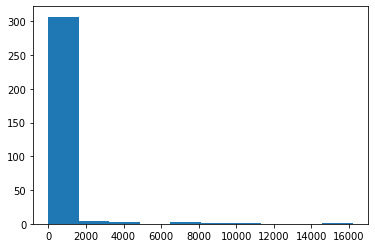

In [15]:
plt.hist([ctn[k] for k in ctn])
plt.show()

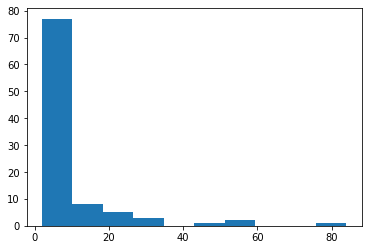

In [16]:
plt.hist([ctn[k] for k in ctn if 1<ctn[k]<100])
plt.show()

In [17]:
# must be no smaller than 1 page
# >100: outliers
df['pageNum'] = df.apply(lambda df: min(max(df['page_end'] - df['page_start'], 1),100), axis=1)

In [18]:
df['pageNum'].describe()

count    76011.000000
mean         6.792083
std          3.797333
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max        100.000000
Name: pageNum, dtype: float64

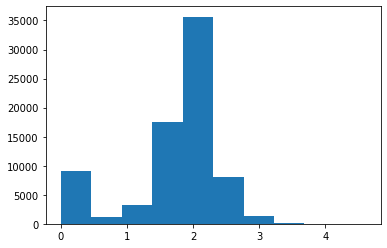

In [19]:
plt.hist(df['pageNum'].apply(log))
plt.show()

In [20]:
def castLen(x):
    try:
        return len(x)
    except:
        return 0

In [21]:
df['refNum'] = df.apply(lambda df: castLen(df["references"]), axis=1)

In [22]:
df["fos"][1]

[{'name': 'Predicate (grammar)', 'w': 0.45572385200000004},
 {'name': 'Parsing', 'w': 0.5548242},
 {'name': 'Support vector machine', 'w': 0.5176992420000001},
 {'name': 'Binary classification', 'w': 0.45089224},
 {'name': 'Top-down and bottom-up design', 'w': 0.4584853},
 {'name': 'Machine learning', 'w': 0.464945555},
 {'name': 'Chunking (psychology)', 'w': 0.5924408},
 {'name': 'Pattern recognition', 'w': 0.46912616500000004},
 {'name': 'Artificial intelligence', 'w': 0.0},
 {'name': 'Computer science', 'w': 0.412245631},
 {'name': 'Sentence', 'w': 0.5030235}]

In [23]:
print(max([i["w"] for i in df["fos"][1]]))

0.5924408


In [24]:
def castFos(df):
    try:
        return max([i["w"] for i in df["fos"]])
    except:
        return 0

In [25]:
df['maxFos'] = df.apply(lambda x: castFos(x), axis=1)

In [26]:
df['maxFos']

0        0.556839
1        0.592441
2        0.582053
3        0.597128
4        0.584847
           ...   
76006    0.772239
76007    0.629271
76008    0.715885
76009    0.602447
76010    0.533532
Name: maxFos, Length: 76011, dtype: float64

In [27]:
df[['n_citation','pageNum','refNum','maxFos']].corr()

,n_citation,pageNum,refNum,maxFos
n_citation,1.000000,0.056279,0.047943,0.040836
pageNum,0.056279,1.000000,0.376698,-0.033972
refNum,0.047943,0.376698,1.000000,-0.020339
maxFos,0.040836,-0.033972,-0.020339,1.000000


In [28]:
sw=[]

with open('lemur-stopwords.txt', 'r') as f:
   sw=f.readlines()

sw=set([i.strip() for i in sw])

In [29]:
sw

{'!',
 '"',
 "'",
 "''",
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '?',
 '`',
 '``',
 'a',
 'about',
 'above',
 'according',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'albeit',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'are',
 'around',
 'as',
 'at',
 'av',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'but',
 'by',
 'can',
 'cannot',
 'canst',
 'certain',
 'cf',
 'choose',
 'contrariwise',
 'cos',
 'could',
 'cu',
 'day',
 'do',
 'does',
 "doesn't",
 'doing',
 'dost',
 'doth',
 'double',
 'down',
 'dual',
 'during',
 'each',
 'either',
 'else',
 'elsewhere',
 'enough',
 'et',
 'etc',
 'even',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everythin

In [30]:
import logging
from collections import defaultdict
from gensim import corpora,models,similarities
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [31]:
df["indexed_abstract"][0]

{'IndexLength': 138,
 'InvertedIndex': {'In': [0, 42],
  'this': [1, 101, 119],
  'paper,': [2],
  'we': [3, 44, 103],
  'investigate': [4],
  'a': [5, 26, 106, 128],
  'supervised': [6],
  'machine': [7],
  'learning': [8, 12],
  'framework': [9],
  'for': [10, 115, 132],
  'automatically': [11],
  'of': [13, 30, 36, 49, 65, 81],
  'English': [14, 116],
  'Light': [15],
  'Verb': [16],
  'Constructions': [17],
  '(LVCs).': [18],
  'Our': [19],
  'system': [20, 59, 87],
  'achieves': [21],
  'an': [22, 46],
  '86.3%': [23],
  'accuracy': [24],
  'with': [25, 34, 89, 110],
  'baseline': [27],
  '(chance)': [28],
  'performance': [29, 71],
  '52.2%': [31],
  'when': [32],
  'trained': [33, 60, 88],
  'groups': [35],
  'either': [37],
  'contextual': [38, 51, 90],
  'or': [39],
  'statistical': [40, 53],
  'features.': [41],
  'addition,': [43],
  'present': [45],
  'in-depth': [47],
  'analysis': [48],
  'these': [50, 62],
  'and': [52, 55, 125],
  'features': [54, 68, 91],
  'show': [56

In [32]:
df["indexed_abstract"][0]['InvertedIndex']

{'In': [0, 42],
 'this': [1, 101, 119],
 'paper,': [2],
 'we': [3, 44, 103],
 'investigate': [4],
 'a': [5, 26, 106, 128],
 'supervised': [6],
 'machine': [7],
 'learning': [8, 12],
 'framework': [9],
 'for': [10, 115, 132],
 'automatically': [11],
 'of': [13, 30, 36, 49, 65, 81],
 'English': [14, 116],
 'Light': [15],
 'Verb': [16],
 'Constructions': [17],
 '(LVCs).': [18],
 'Our': [19],
 'system': [20, 59, 87],
 'achieves': [21],
 'an': [22, 46],
 '86.3%': [23],
 'accuracy': [24],
 'with': [25, 34, 89, 110],
 'baseline': [27],
 '(chance)': [28],
 'performance': [29, 71],
 '52.2%': [31],
 'when': [32],
 'trained': [33, 60, 88],
 'groups': [35],
 'either': [37],
 'contextual': [38, 51, 90],
 'or': [39],
 'statistical': [40, 53],
 'features.': [41],
 'addition,': [43],
 'present': [45],
 'in-depth': [47],
 'analysis': [48],
 'these': [50, 62],
 'and': [52, 55, 125],
 'features': [54, 68, 91],
 'show': [56],
 'that': [57],
 'the': [58, 75, 78, 86],
 'by': [61],
 'two': [63],
 'types': [6

In [33]:
def removeSW(x):
    ans=[]
    try:
        for i in x['InvertedIndex']:
            if i.lower() not in sw:
                ans.append(i.lower())
    except:
        pass
    return ans

In [34]:
df['abstract_rmsw'] = df.apply(lambda df: removeSW(df["indexed_abstract"]), axis=1)

In [35]:
list(df['abstract_rmsw'])

[['paper,',
  'investigate',
  'supervised',
  'machine',
  'learning',
  'framework',
  'automatically',
  'english',
  'light',
  'verb',
  'constructions',
  '(lvcs).',
  'system',
  'achieves',
  '86.3%',
  'accuracy',
  'baseline',
  '(chance)',
  'performance',
  '52.2%',
  'trained',
  'groups',
  'contextual',
  'statistical',
  'features.',
  'addition,',
  'present',
  'in-depth',
  'analysis',
  'features',
  'show',
  'two',
  'types',
  'cosmetically',
  'different',
  'reaches',
  'similar',
  'empirically.',
  'however,',
  'situation',
  'surface',
  'structures',
  'candidate',
  'lvcs',
  'identical,',
  'contain',
  'information',
  'surrounding',
  'words',
  'performs',
  '16.7%',
  'better.\r\n\r\nin',
  'study,',
  'construct',
  'balanced',
  'benchmark',
  'dataset',
  '2,162',
  'sentences',
  'bnc',
  'lvcs.',
  'data',
  'set',
  'publicly',
  'available',
  'useful',
  'computational',
  'resource',
  'research',
  'mwes',
  'general.'],
 ['functional',
  '

In [36]:
texts=list(df['abstract_rmsw'])

In [37]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2020-10-26 15:35:57,646 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-26 15:35:58,501 : INFO : adding document #10000 to Dictionary(51385 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:35:59,716 : INFO : adding document #20000 to Dictionary(84360 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:36:00,740 : INFO : adding document #30000 to Dictionary(107594 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:36:01,819 : INFO : adding document #40000 to Dictionary(133375 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:36:02,645 : INFO : adding document #50000 to Dictionary(158128 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:36:03,651 : INFO : adding document #60000 to Dictionary(181336 unique tokens: ['(chance)', '(lvcs).', '16.7%', '2,162', '52.2%']...)
2020-10-26 15:36:04,682 : INFO : 

In [38]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=100, alpha='auto', passes=1)

2020-10-26 15:36:09,616 : INFO : using autotuned alpha, starting with [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
2020-10-26 15:36:09,617 : INFO : using symmetric eta at 0.01
2020-10-26 15:36:09,640 : INFO : using serial LDA version on this node
2020-10-26 15:36:11,663 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 76011 documents, updating model once every 2000 documents, evaluating pe

2020-10-26 15:36:28,823 : INFO : topic #48 (0.010): 0.010*"latent" + 0.010*"space." + 0.009*"automatically" + 0.008*"model" + 0.007*"method" + 0.007*"paper" + 0.006*"show" + 0.005*"inferring" + 0.005*"structure" + 0.005*"ignoring"
2020-10-26 15:36:28,825 : INFO : topic #13 (0.011): 0.007*"method" + 0.007*"show" + 0.007*"present" + 0.007*"results" + 0.006*"two" + 0.006*"language" + 0.006*"paper" + 0.005*"natural" + 0.005*"based" + 0.005*"system"
2020-10-26 15:36:28,827 : INFO : topic #35 (0.011): 0.010*"language" + 0.006*"information" + 0.006*"data" + 0.006*"natural" + 0.006*"approach" + 0.005*"system" + 0.005*"speech" + 0.005*"present" + 0.005*"text" + 0.005*"paper"
2020-10-26 15:36:28,830 : INFO : topic #0 (0.011): 0.011*"show" + 0.008*"model" + 0.007*"present" + 0.007*"semantic" + 0.007*"paper," + 0.006*"task" + 0.006*"classification" + 0.006*"paper" + 0.006*"features" + 0.005*"approach"
2020-10-26 15:36:28,921 : INFO : topic diff=0.089999, rho=0.577350
2020-10-26 15:36:28,944 : INFO

2020-10-26 15:36:49,257 : INFO : topic #30 (0.010): 0.060*"detection." + 0.028*"database," + 0.022*"distinctive" + 0.015*"measures" + 0.012*"(which" + 0.012*"addressed" + 0.012*"directions." + 0.011*"measures." + 0.010*"organized" + 0.009*"plausible"
2020-10-26 15:36:49,260 : INFO : topic #20 (0.013): 0.102*"images." + 0.013*"proposed" + 0.011*"multiple" + 0.010*"real-world" + 0.009*"images" + 0.008*"perspective" + 0.008*"datasets" + 0.008*"propose" + 0.008*"high-level" + 0.007*"constant"
2020-10-26 15:36:49,262 : INFO : topic #19 (0.013): 0.025*"object" + 0.020*"objects" + 0.012*"noise" + 0.011*"solution" + 0.011*"approximation" + 0.011*"point" + 0.010*"matrix" + 0.009*"show" + 0.009*"caused" + 0.009*"efficient"
2020-10-26 15:36:49,265 : INFO : topic #92 (0.014): 0.183*"image" + 0.026*"synthetic" + 0.016*"algorithm" + 0.012*"surface" + 0.010*"problem" + 0.010*"real" + 0.009*"method" + 0.008*"given" + 0.007*"constraints" + 0.006*"propose"
2020-10-26 15:36:49,356 : INFO : topic diff=0.0

2020-10-26 15:37:10,995 : INFO : topic #29 (0.011): 0.023*"exhibit" + 0.023*"poor" + 0.020*"filters." + 0.018*"rarely" + 0.016*"contrast," + 0.014*"decomposing" + 0.011*"step," + 0.010*"groups." + 0.010*"assigned" + 0.009*"group."
2020-10-26 15:37:10,997 : INFO : topic #71 (0.016): 0.148*"motion" + 0.072*"reconstruction" + 0.018*"environments." + 0.016*"temporal" + 0.015*"spatial" + 0.014*"configurations" + 0.013*"recovery" + 0.010*"embedding" + 0.009*"affinity" + 0.009*"removing"
2020-10-26 15:37:10,999 : INFO : topic #19 (0.017): 0.023*"object" + 0.018*"objects" + 0.014*"solution" + 0.011*"point" + 0.011*"fast" + 0.011*"approximation" + 0.011*"efficient" + 0.011*"noise" + 0.011*"algorithm" + 0.010*"matrix"
2020-10-26 15:37:11,001 : INFO : topic #92 (0.019): 0.173*"image" + 0.025*"synthetic" + 0.020*"algorithm" + 0.018*"real" + 0.015*"surface" + 0.011*"method" + 0.010*"problem" + 0.009*"given" + 0.008*"constraints" + 0.005*"new"
2020-10-26 15:37:11,102 : INFO : topic diff=0.060194, rh

2020-10-26 15:37:46,973 : INFO : topic #12 (0.011): 0.047*"cut" + 0.046*"transfer" + 0.036*"dimension" + 0.035*"identity" + 0.030*"transferring" + 0.027*"characterized" + 0.019*"interacting" + 0.019*"categories," + 0.018*"behavior." + 0.017*"reasons"
2020-10-26 15:37:46,976 : INFO : topic #29 (0.012): 0.035*"exhibit" + 0.028*"contrast," + 0.025*"poor" + 0.025*"filters." + 0.018*"rarely" + 0.013*"decomposing" + 0.013*"step," + 0.010*"50" + 0.009*"assigned" + 0.009*"result,"
2020-10-26 15:37:46,980 : INFO : topic #73 (0.019): 0.069*"network" + 0.056*"neural" + 0.048*"deep" + 0.047*"convolutional" + 0.037*"image" + 0.015*"learning" + 0.013*"faces" + 0.013*"architecture" + 0.012*"training" + 0.011*"model"
2020-10-26 15:37:46,984 : INFO : topic #19 (0.020): 0.020*"object" + 0.015*"objects" + 0.014*"solution" + 0.012*"point" + 0.011*"efficient" + 0.011*"fast" + 0.010*"computational" + 0.010*"algorithm" + 0.010*"problem" + 0.010*"approximation"
2020-10-26 15:37:46,987 : INFO : topic #92 (0.02

2020-10-26 15:38:05,490 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:38:07,481 : INFO : topic #12 (0.012): 0.047*"transfer" + 0.034*"cut" + 0.028*"characterized" + 0.027*"dimension" + 0.024*"identity" + 0.017*"phrases." + 0.017*"covering" + 0.016*"collective" + 0.016*"reasons" + 0.015*"transferring"
2020-10-26 15:38:07,484 : INFO : topic #30 (0.012): 0.077*"detection." + 0.037*"database," + 0.037*"addressed" + 0.026*"directions." + 0.025*"distinctive" + 0.022*"add" + 0.021*"measures." + 0.020*"(which" + 0.017*"organized" + 0.017*"affected"
2020-10-26 15:38:07,486 : INFO : topic #73 (0.020): 0.067*"neural" + 0.061*"network" + 0.037*"deep" + 0.036*"convolutional" + 0.029*"image" + 0.014*"architecture" + 0.014*"learning" + 0.013*"model" + 0.013*"faces" + 0.012*"training"
2020-10-26 15:38:07,488 : INFO : topic #19 (0.023): 0.017*"object" + 0.013*"solution" + 0.013*"objects" + 0.012*"algorithm" + 0.011*"problem" + 0.011*"point" + 0.011*"efficien

2020-10-26 15:38:25,698 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:38:27,980 : INFO : topic #30 (0.012): 0.061*"detection." + 0.046*"addressed" + 0.030*"database," + 0.028*"add" + 0.026*"directions." + 0.024*"organized" + 0.024*"measures." + 0.023*"affected" + 0.022*"distinctive" + 0.020*"(which"
2020-10-26 15:38:27,984 : INFO : topic #12 (0.012): 0.057*"transfer" + 0.052*"dimension" + 0.039*"characterized" + 0.031*"cut" + 0.024*"behavior." + 0.023*"interacting" + 0.023*"identity" + 0.021*"covering" + 0.021*"transferring" + 0.018*"reasons"
2020-10-26 15:38:27,989 : INFO : topic #73 (0.023): 0.068*"network" + 0.061*"neural" + 0.045*"deep" + 0.040*"convolutional" + 0.027*"image" + 0.019*"learning" + 0.015*"architecture" + 0.013*"training" + 0.012*"model" + 0.012*"faces"
2020-10-26 15:38:27,993 : INFO : topic #19 (0.028): 0.014*"algorithm" + 0.013*"solution" + 0.013*"approximation" + 0.012*"efficient" + 0.012*"linear" + 0.011*"problems" + 0.

2020-10-26 15:38:52,394 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:38:54,971 : INFO : topic #30 (0.013): 0.045*"addressed" + 0.034*"detection." + 0.032*"add" + 0.025*"(which" + 0.023*"organized" + 0.023*"affected" + 0.022*"database," + 0.022*"measures." + 0.020*"memory," + 0.020*"directions."
2020-10-26 15:38:54,975 : INFO : topic #12 (0.013): 0.055*"transfer" + 0.051*"dimension" + 0.044*"behavior." + 0.043*"characterized" + 0.026*"reasons" + 0.026*"interacting" + 0.022*"covering" + 0.021*"cut" + 0.021*"definite" + 0.020*"collective"
2020-10-26 15:38:54,978 : INFO : topic #96 (0.025): 0.025*"learning" + 0.017*"training" + 0.014*"propose" + 0.013*"datasets" + 0.012*"data" + 0.012*"experiments" + 0.009*"show" + 0.009*"classifier" + 0.009*"proposed" + 0.008*"networks"
2020-10-26 15:38:54,981 : INFO : topic #19 (0.033): 0.015*"algorithm" + 0.015*"problems" + 0.015*"approximation" + 0.013*"problem" + 0.012*"efficient" + 0.012*"solution" + 0.01

2020-10-26 15:39:11,845 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:39:14,422 : INFO : topic #30 (0.013): 0.055*"addressed" + 0.041*"add" + 0.027*"(which" + 0.025*"detection." + 0.023*"affected" + 0.022*"forming" + 0.022*"organized" + 0.020*"memory," + 0.019*"psychological" + 0.017*"participants"
2020-10-26 15:39:14,426 : INFO : topic #12 (0.014): 0.063*"transfer" + 0.044*"characterized" + 0.042*"behavior." + 0.039*"dimension" + 0.026*"reasons" + 0.026*"interacting" + 0.023*"collective" + 0.022*"argumentation" + 0.019*"arguments" + 0.018*"cut"
2020-10-26 15:39:14,428 : INFO : topic #35 (0.027): 0.015*"system" + 0.013*"paper" + 0.013*"knowledge" + 0.012*"systems" + 0.010*"language" + 0.009*"actions" + 0.008*"information" + 0.008*"research" + 0.007*"natural" + 0.007*"work"
2020-10-26 15:39:14,431 : INFO : topic #92 (0.035): 0.055*"image" + 0.028*"real" + 0.018*"synthetic" + 0.017*"algorithm" + 0.016*"world" + 0.012*"real-world" + 0.011*"prob

2020-10-26 15:39:37,777 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:39:40,264 : INFO : topic #30 (0.014): 0.068*"mine" + 0.052*"addressed" + 0.031*"detection." + 0.030*"database," + 0.030*"add" + 0.029*"measures." + 0.027*"organized" + 0.026*"measures," + 0.023*"targeting" + 0.023*"measures"
2020-10-26 15:39:40,266 : INFO : topic #9 (0.014): 0.068*"ground" + 0.045*"selection." + 0.031*"scheduling" + 0.026*"quantitatively" + 0.022*"firstly" + 0.022*"predictor" + 0.020*"intermediate" + 0.018*"yielding" + 0.018*"comprising" + 0.017*"pilot"
2020-10-26 15:39:40,270 : INFO : topic #35 (0.032): 0.015*"system" + 0.012*"paper" + 0.012*"systems" + 0.011*"knowledge" + 0.011*"data" + 0.010*"information" + 0.008*"research" + 0.008*"language" + 0.007*"describe" + 0.007*"work"
2020-10-26 15:39:40,273 : INFO : topic #92 (0.039): 0.041*"real" + 0.029*"image" + 0.025*"synthetic" + 0.021*"world" + 0.019*"real-world" + 0.017*"algorithm" + 0.011*"problem" + 0.

2020-10-26 15:40:02,578 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:40:05,113 : INFO : topic #30 (0.014): 0.047*"addressed" + 0.041*"mine" + 0.031*"add" + 0.031*"measures," + 0.030*"detection." + 0.027*"measures." + 0.026*"participants" + 0.024*"measures" + 0.024*"organized" + 0.024*"(which"
2020-10-26 15:40:05,116 : INFO : topic #9 (0.015): 0.055*"ground" + 0.049*"selection." + 0.029*"qualitatively" + 0.027*"yielding" + 0.027*"predictor" + 0.027*"quantitatively" + 0.024*"intermediate" + 0.022*"biologically" + 0.019*"scheduling" + 0.019*"moves"
2020-10-26 15:40:05,120 : INFO : topic #35 (0.036): 0.016*"system" + 0.012*"systems" + 0.011*"paper" + 0.010*"data" + 0.010*"language" + 0.010*"information" + 0.009*"knowledge" + 0.007*"processing" + 0.007*"work" + 0.007*"describe"
2020-10-26 15:40:05,123 : INFO : topic #92 (0.041): 0.040*"real" + 0.029*"image" + 0.025*"synthetic" + 0.019*"world" + 0.018*"real-world" + 0.016*"algorithm" + 0.012*"sim

2020-10-26 15:40:25,730 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:40:28,553 : INFO : topic #30 (0.015): 0.047*"addressed" + 0.034*"unbiased" + 0.032*"add" + 0.032*"measures." + 0.031*"measures," + 0.031*"participants" + 0.029*"organized" + 0.029*"(which" + 0.028*"mine" + 0.027*"detection."
2020-10-26 15:40:28,556 : INFO : topic #9 (0.015): 0.061*"ground" + 0.039*"selection." + 0.035*"predictor" + 0.035*"yielding" + 0.031*"intermediate" + 0.029*"biologically" + 0.025*"qualitatively" + 0.024*"art." + 0.023*"quantitatively" + 0.020*"log-likelihood"
2020-10-26 15:40:28,560 : INFO : topic #51 (0.040): 0.019*"learning" + 0.017*"performance" + 0.016*"show" + 0.016*"propose" + 0.013*"state-of-the-art" + 0.013*"data" + 0.012*"paper," + 0.011*"methods" + 0.011*"approach" + 0.011*"significantly"
2020-10-26 15:40:28,563 : INFO : topic #92 (0.044): 0.038*"real" + 0.029*"synthetic" + 0.027*"image" + 0.019*"real-world" + 0.018*"world" + 0.015*"algorith

2020-10-26 15:40:51,157 : INFO : merging changes from 2000 documents into a model of 76011 documents
2020-10-26 15:40:53,928 : INFO : topic #30 (0.015): 0.052*"addressed" + 0.048*"participants" + 0.039*"organized" + 0.039*"measures." + 0.034*"measures," + 0.032*"add" + 0.030*"affected" + 0.027*"mine" + 0.026*"unbiased" + 0.023*"measures"
2020-10-26 15:40:53,931 : INFO : topic #9 (0.015): 0.056*"ground" + 0.037*"selection." + 0.032*"yielding" + 0.030*"predictor" + 0.030*"intermediate" + 0.028*"adoption" + 0.025*"brought" + 0.020*"quantitatively" + 0.020*"qualitatively" + 0.019*"art."
2020-10-26 15:40:53,934 : INFO : topic #92 (0.046): 0.039*"real" + 0.029*"world" + 0.022*"image" + 0.021*"synthetic" + 0.016*"real-world" + 0.013*"algorithm" + 0.011*"simulated" + 0.011*"data" + 0.010*"data." + 0.009*"problem"
2020-10-26 15:40:53,937 : INFO : topic #35 (0.048): 0.018*"information" + 0.012*"system" + 0.012*"systems" + 0.011*"paper" + 0.009*"research" + 0.009*"data" + 0.007*"language" + 0.007

2020-10-26 15:41:16,278 : INFO : merging changes from 11 documents into a model of 76011 documents
2020-10-26 15:41:19,198 : INFO : topic #30 (0.016): 0.050*"participants" + 0.048*"addressed" + 0.036*"organized" + 0.035*"add" + 0.033*"mine" + 0.033*"measures." + 0.032*"affected" + 0.029*"measures," + 0.029*"targeting" + 0.023*"composite"
2020-10-26 15:41:19,201 : INFO : topic #9 (0.016): 0.113*"terminals" + 0.051*"ground" + 0.032*"adoption" + 0.028*"selection." + 0.027*"intermediate" + 0.024*"informed" + 0.023*"yielding" + 0.021*"brought" + 0.020*"predictor" + 0.019*"scheduling"
2020-10-26 15:41:19,205 : INFO : topic #51 (0.052): 0.018*"effective" + 0.018*"improve" + 0.018*"methods" + 0.017*"paper," + 0.017*"propose" + 0.016*"existing" + 0.015*"show" + 0.014*"results" + 0.014*"performance" + 0.014*"approach"
2020-10-26 15:41:19,208 : INFO : topic #19 (0.057): 0.015*"show" + 0.015*"algorithm" + 0.014*"number" + 0.014*"approximation" + 0.012*"problem" + 0.012*"efficient" + 0.011*"size" +

In [39]:
lda.print_topics()

2020-10-26 15:41:19,442 : INFO : topic #30 (0.016): 0.050*"participants" + 0.048*"addressed" + 0.036*"organized" + 0.035*"add" + 0.033*"mine" + 0.033*"measures." + 0.032*"affected" + 0.029*"measures," + 0.029*"targeting" + 0.023*"composite"
2020-10-26 15:41:19,446 : INFO : topic #9 (0.016): 0.113*"terminals" + 0.051*"ground" + 0.032*"adoption" + 0.028*"selection." + 0.027*"intermediate" + 0.024*"informed" + 0.023*"yielding" + 0.021*"brought" + 0.020*"predictor" + 0.019*"scheduling"
2020-10-26 15:41:19,449 : INFO : topic #42 (0.017): 0.040*"reach" + 0.039*"measurement" + 0.030*"unknown" + 0.021*"estimating" + 0.020*"depending" + 0.018*"simultaneous" + 0.017*"dictionary" + 0.016*"(4)" + 0.015*"composed" + 0.015*"closer"
2020-10-26 15:41:19,452 : INFO : topic #12 (0.017): 0.064*"communities" + 0.054*"behavior." + 0.043*"dimension" + 0.036*"characterized" + 0.032*"today's" + 0.032*"posts" + 0.032*"collective" + 0.031*"transfer" + 0.029*"reasons" + 0.027*"covering"
2020-10-26 15:41:19,457 :

[(30,
  '0.050*"participants" + 0.048*"addressed" + 0.036*"organized" + 0.035*"add" + 0.033*"mine" + 0.033*"measures." + 0.032*"affected" + 0.029*"measures," + 0.029*"targeting" + 0.023*"composite"'),
 (9,
  '0.113*"terminals" + 0.051*"ground" + 0.032*"adoption" + 0.028*"selection." + 0.027*"intermediate" + 0.024*"informed" + 0.023*"yielding" + 0.021*"brought" + 0.020*"predictor" + 0.019*"scheduling"'),
 (42,
  '0.040*"reach" + 0.039*"measurement" + 0.030*"unknown" + 0.021*"estimating" + 0.020*"depending" + 0.018*"simultaneous" + 0.017*"dictionary" + 0.016*"(4)" + 0.015*"composed" + 0.015*"closer"'),
 (12,
  '0.064*"communities" + 0.054*"behavior." + 0.043*"dimension" + 0.036*"characterized" + 0.032*"today\'s" + 0.032*"posts" + 0.032*"collective" + 0.031*"transfer" + 0.029*"reasons" + 0.027*"covering"'),
 (82,
  '0.046*"evolution" + 0.044*"specifically" + 0.038*"controlled" + 0.034*"behavior," + 0.031*"strongly" + 0.028*"devise" + 0.025*"criterion" + 0.025*"choosing" + 0.024*"connectio